# 07: Automatic Differentiation

**Exercise:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/07-ad/07-ad-exercise.ipynb)
**Solution:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/07-ad/07-ad.ipynb)

# Modes of Differentiation

Differentiation is a fundamental operation in calculus, with various applications in the fields of science, engineering, and beyond. Depending on the context and requirements, different methods or "modes" of differentiation can be employed. Below are the primary modes of differentiation:

![Modes of differentiation](differentiation.png)

## 1. Symbolic Differentiation

Symbolic differentiation is the process of finding the derivative of an expression using the rules of calculus, exactly as one might do by hand. It works on symbolic representations of functions, employing rules like the power rule, chain rule, and product rule, among others.

**Pros**:
- Provides exact, closed-form expressions for derivatives.
  
**Cons**:
- Can lead to expression swell, where the resulting expressions become very large.
- Not always feasible for complex functions or when the symbolic form isn't known.

## 2. Automatic Differentiation (AD)

Automatic differentiation computes the derivative of a function as it is being evaluated. AD is neither symbolic nor numerical differentiation but utilizes the underlying computational graph and dual numbers to obtain exact derivatives.

**Pros**:
- Provides exact derivatives.
- Well-suited for complex functions where symbolic differentiation would be cumbersome.
  
**Cons**:
- Requires specialized software or libraries.
- Can be computationally intensive for large functions or systems.

### Types of AD:
- **Forward Mode**: Efficient when the number of inputs is smaller than the number of outputs.
- **Reverse Mode**: Efficient when the number of outputs is smaller than the number of inputs.

## 3. Numerical Differentiation

Numerical differentiation estimates derivatives using finite differences. For example, the central difference method approximates the derivative as:
$$ f'(x) \approx \frac{f(x + h) - f(x - h)}{2h} $$

**Pros**:
- Simple to implement.
- Doesn't require the symbolic form of the function.
  
**Cons**:
- Prone to rounding errors, especially for small $h$.
- Less accurate compared to symbolic or AD methods.

## 4. Manual Differentiation

This is the process of computing the derivative by hand, using one's understanding of calculus rules. Once derived, the resulting expression can be coded directly into software.

**Pros**:
- Allows for optimization and simplification while deriving.
- No need for external libraries or tools.
  
**Cons**:
- Error-prone and time-consuming.
- Not scalable for complex or large functions.


## Introduction to Automatic Differentiation

Automatic differentiation, often abbreviated as AD, is a set of techniques to compute derivatives of functions specified by computer programs. Unlike symbolic differentiation, which operates on symbolic representations of functions, and numerical differentiation, which uses finite difference methods, AD computes exact derivatives by executing the given program and is not plagued by numerical instability.

## Dual Numbers

Dual numbers form the foundation for forward mode automatic differentiation. A dual number is expressed as:
$$ z = a + b \epsilon $$
Where:
- $ a $ is the real part.
- $ b $ is the dual part.
- $ \epsilon $ is the dual unit with the property $ \epsilon^2 = 0 $.

With dual numbers, for a function $ f(x) $, evaluating $ f(x + \epsilon) $ provides:
$$ f(x) + f'(x)\epsilon $$
This encapsulates both the function's value and its derivative.

For instance, to differentiate $ f(x) = x^2 $ using dual numbers:
$$ f(x + \epsilon) = (x + \epsilon)^2 = x^2 + 2x\epsilon + \epsilon^2 = x^2 + 2x\epsilon $$
The coefficient of $ \epsilon $ represents the derivative, $ 2x $.

## Graph-based Differentiation

Graph-based differentiation, often linked to reverse-mode automatic differentiation, is popularized by deep learning frameworks like TensorFlow and PyTorch.

1. **Computation Graphs**: Functions, made up of basic operations, can be visualized as a directed acyclic graph (DAG). In this graph, nodes denote variables or operations, and edges highlight dependencies.

2. **Forward Pass**: This phase involves computing the function from input to output, populating the graph's nodes with intermediate values.

3. **Backward Pass**: Using the chain rule of calculus, derivatives are computed in reverse, from output to input. This 'reverse' phase computes gradients for each node, accumulating gradients as it traverses.

## Differences between Dual Numbers and Graph-based Differentiation:

1. **Mode**: Dual numbers are suited for forward mode AD, where derivatives with respect to each input variable are calculated sequentially. Graph-based differentiation, prominent in deep learning, generally employs reverse mode AD, determining the derivative with respect to all input variables simultaneously.

2. **Efficiency for Different Functions**: Forward mode (dual numbers) excels in functions where the number of inputs is dwarfed by the number of outputs (like parameter estimation). Conversely, reverse mode (graph-based) shines when there are fewer outputs than inputs, a scenario familiar in deep learning with numerous parameters and a scalar loss function.

3. **Implementation**: Dual numbers expand on number concepts and arithmetic operations, whereas graph-based differentiation often demands a more intricate framework to assemble and navigate the computation graph.


# Forward and Reverse Mode Automatic Differentiation (AD) 

Automatic differentiation (AD) is a powerful technique for obtaining exact derivatives of functions, without the challenges associated with symbolic or numerical differentiation. AD can be broken down into two primary modes: forward mode and reverse mode. Using the function 
$$ y = x_1^2 + x_2 $$
as an example, let's delve into these two modes.


## 1. Forward Mode AD

In forward mode AD, we differentiate with respect to one input variable at a time. This means that for a function with `n` inputs, we'd perform `n` forward passes to obtain all the partial derivatives.

Let's compute the derivatives with respect to $x_1$ and $x_2$ for our function.

![AD graph](ad1.png)
> Break the function into elementary operations

![AD graph variables](ad2.png)
> Assign names to nodes

![AD forward evaluation](ad3.png)
> Break the function into elementary operations

### Derivative with respect to $x_1$:
Starting with a seed value $\dot{x}_1 = 1$ and $\dot{x}_2 = 0$ (indicating we're differentiating with respect to $x_1$):

1. Compute $\dot{x}_1^2$: Using the rule $(x^2)' = 2x$, we get 
$$ \dot{x}_1^2 = 2x_1 \cdot \dot{x}_1 = 2x_1 $$

2. As there's no $x_2$ term dependent on $x_1$, its contribution is 0.

Combining these, the derivative 
$$ \frac{\partial y}{\partial x_1} = 2x_1 $$

### Derivative with respect to $x_2$:
Now, seeding with $\dot{x}_1 = 0$ and $\dot{x}_2 = 1$:

1. The $x_1^2$ term doesn't contribute since it's independent of $x_2$.

2. For the term $x_2$, the derivative is simply 
$$ \dot{x}_2 = 1 $$

Thus, 
$$ \frac{\partial y}{\partial x_2} = 1 $$

## 2. Reverse Mode AD

In reverse mode AD, the calculations propagate from the output backwards to the inputs. This means that for a function with `n` outputs, we'd perform `n` backward passes to get all the derivatives. It's particularly efficient when `n` is small, which is why it's popular in deep learning where we usually compute derivatives of a scalar loss.

Using our function, here's how reverse mode AD would work:

![Reverse mode AD](ad4.png)
> Backward pass to compute partial derivatives

![Chain rule AD](ad5.png)
> Use chain rule to calculate gradient

![Chain rule AD](ad6.png)
> Use chain rule to calculate gradient

![Chain rule AD](ad7.png)
> Use chain rule to calculate gradient

1. Do a forward pass to compute the function value:
$$ y = x_1^2 + x_2 $$

2. Start the backward pass with a seed $\dot{y} = 1$.

3. For the term $x_1^2$:
Using the chain rule, 
$$ \frac{\partial y}{\partial x_1} = 2x_1 \cdot \dot{y} = 2x_1 $$

4. For the term $x_2$:
Again, using the chain rule, 
$$ \frac{\partial y}{\partial x_2} = \dot{y} = 1 $$


Both forward and reverse mode AD have their strengths. The choice between them depends on the relationship between the number of inputs and outputs for a function. For our simple example, both methods yield the same results, but their computational efficiency would differ for functions with many more inputs or outputs.


## PyTorch implementation

PyTorch's `autograd` module provides automatic differentiation capabilities, enabling us to compute gradients for tensor operations. Every tensor in PyTorch has an attribute `requires_grad`. Setting this attribute to `True` indicates to PyTorch that gradients should be computed for this tensor during backpropagation.

To calculate the derivatives of the function $y = x_1^2 + x_2$ at $x_1 = 2$ and $x_2 = 3$ using PyTorch, follow the code below:

In [6]:
import torch

# Define the variables and indicate that they require gradients
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)

# Define the function
y = x1**2 + x2

# Calculate the gradients
y.backward()

# Print the gradients
print(f"dy/dx1: {x1.grad.item()}")
print(f"dy/dx2: {x2.grad.item()}")

dy/dx1: 4.0
dy/dx2: 1.0


# Forward and inverse problems

Numerical modeling provides a framework to simulate and understand complex systems. Depending on the available information and objectives, one might approach modeling from a forward or inverse perspective.

![forward-inverse](forward-inverse.png)

## Forward Numerical Modeling

Forward modeling refers to predicting the outcome (or output) of a model given a set of known input parameters. It's about solving the direct problem: starting with known parameters and then computing the resulting observation or response.

### Example:
Imagine a groundwater flow system. In forward modeling, you might know:
- Initial conditions (e.g., initial water table height)
- Boundary conditions (e.g., rate of water inflow or outflow)
- System properties (e.g., soil permeability)

Using these inputs, your numerical model predicts how the water table changes over time.

### Equations (conceptual):
Given a system governed by a function $F$ and input parameters $P$:
$$ Observations = F(P) $$

## Inverse (or Reverse) Numerical Modeling

Inverse modeling, sometimes termed "reverse," is the opposite approach. Starting with observations or data, one tries to infer the input parameters or system properties that might have led to this data. This is typically more challenging due to potential non-uniqueness in solutions. Regularization or constraints might be needed to ensure meaningful results.

### Example:
Using the groundwater scenario, suppose you have data on water table heights over time. Inverse modeling attempts to deduce properties like soil permeability or boundary conditions based on this data.

### Equations (conceptual):
Given a system governed by a function $F$ and observations $O$:
$$ Estimated\_Parameters = F^{-1}(O) $$

This "inversion" doesn't imply the mathematical inversion of a function but often uses optimization techniques to minimize discrepancies between model predictions and actual observations.

In essence:
- **Forward Modeling**: Given parameters, predict outcomes.
- **Inverse Modeling**: Given outcomes, estimate parameters.

Choosing between these approaches depends on the problem, available data, and analysis goals.


# Inverse Modeling of Projectile Motion using Explicit Euler

Inverse modeling for a projectile's motion aims to determine the initial conditions or parameters of a projectile based on observed outcomes. In this context, we'll infer the initial velocity and launch angle of a projectile using its range (horizontal distance traveled) and the explicit Euler method.

<video width="720" controls>
  <source src="projectile.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>


## Problem Statement

Given a projectile's range (distance $R$), our goal is to determine its initial velocity $v_0$ and launch angle $\theta$.

## Equations of Motion:

The horizontal and vertical equations of motion for a projectile without air resistance are:
$$ 
x(t) = v_0 \cos(\theta) t 
$$
$$
y(t) = v_0 \sin(\theta) t - \frac{1}{2} g t^2
$$

Where:
- $x(t)$ and $y(t)$ represent the horizontal and vertical positions at time $t$, respectively.
- $g$ denotes the acceleration due to gravity.

## Inverse Modeling using Explicit Euler:

To apply the explicit Euler method in our inverse modeling:

1. **Discretization**: Break the flight of the projectile into small time intervals, $\Delta t$.

2. **Iterative Process**: Starting with a guess for $v_0$ and $\theta$:

    a. Calculate the next position with Euler's method:
    $$
    x_{i+1} = x_i + \Delta t \cdot v_0 \cos(\theta)
    $$
    $$
    y_{i+1} = y_i + \Delta t \cdot (v_0 \sin(\theta) - g t_i)
    $$

    b. Continue until $y_{i+1}$ approaches 0 (indicating the projectile has landed).

    c. If the final $x_{i+1}$ aligns closely with the given range $R$, our guessed parameters are accurate. If not, adjust $v_0$ and $\theta$ and repeat.

3. **Optimization**: The objective is to minimize the difference between the computed range (via Euler's method) and the provided range $R$. Employ optimization techniques such as gradient descent or genetic algorithms to fine-tune our guesses for $v_0$ and $\theta$.

Inverse modeling of projectile motion with explicit Euler can help deduce the launch parameters based on observed data. While we considered range as our observed metric, other data like max height or flight time can be utilized. The efficacy of this method depends on the chosen $\Delta t$ and the optimization algorithm's robustness.

![Inverse projectile](inverse-projectile.png)

# JAX: Autograd and XLA Library

JAX is an extensible library for numerical computing, developed by researchers at Google. It's renowned for its capabilities in automatic differentiation and is equipped to utilize hardware accelerators like GPUs and TPUs through XLA (Accelerated Linear Algebra).

## Key Features

### Automatic Differentiation
JAX can compute gradients of functions, simplifying the development of optimization and machine learning algorithms.

In [1]:
!pip3 install -U "jax[cpu]" --quiet

In [2]:
import jax.numpy as jnp
from jax import grad

def f(x):
    return jnp.sin(x)

df = grad(f)
print(df(1.0))  # Outputs the cosine of 1.0

0.5403023


I0000 00:00:1696376199.170758       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


### Hardware Acceleration

JAX supports running on different hardware accelerators, offering optimized performance on GPUs and TPUs by compiling Python functions to XLA code.

### Functional Programming Paradigm

JAX encourages a functional approach to programming, implying that functions are pure and free from side effects, facilitating accurate transformations.

### JIT Compilation

JAX can JIT (Just-In-Time) compile Python functions to enhance execution speed, particularly in loop-heavy computations.

In [3]:
from jax import jit

@jit
def f(x):
    return jnp.sin(x)

print(f(1.0))

0.841471


### Vectorization

Using vmap (vectorizing map), JAX can automatically vectorize functions, removing the need for explicit loops and allowing batch processing.

### Value and Gradient Computation

JAX’s value_and_grad utility returns both a function's value and its gradient, making it a useful tool in optimization.

### Random Number Generation

JAX employs explicit random number generator (RNG) keys, which facilitate correct functioning with transformations like grad and jit.

### Custom Gradients

Users can define custom gradients in instances where default gradients are unsuitable or inefficient.

### NumPy Interoperability

JAX extends, and is largely compatible with, NumPy. Therefore, those familiar with NumPy can transition to JAX with relative ease.

### Transformation Combination

JAX allows users to combine multiple transformations (e.g., grad, jit, vmap) effectively and seamlessly.

# JAX Projectile inverse modeling


## Projectile Motion

The equation for the horizontal distance $d$ of a projectile launched at an angle $\theta$ with an initial velocity $v_0$ is:

$$ d = \frac{v_0^2 \sin(2\theta)}{g} $$

Where:
- $d$ is the horizontal distance.
- $v_0$ is the initial velocity.
- $\theta$ is the launch angle.
- $g$ is the acceleration due to gravity, approximately $9.81 \, \text{m/s}^2$.

## Loss Function

Given a target distance $d_{\text{target}}$, our loss function $L$ can be defined as:

$$ L(\theta, v_0) = \left( d_{\text{target}} - d_{\text{prediction}} \right) $$

This squared difference ensures a positive loss and penalizes deviations from the target distance.

## Gradient Descent using Explicit Euler

To minimize our loss function, we'll employ gradient descent. The gradient descent update rules for our parameters are:

$$ v_0 \leftarrow v_0 - \alpha \frac{\partial L}{\partial v_0} $$

$$ \theta \leftarrow \theta - \alpha \frac{\partial L}{\partial \theta} $$

Where:
- $\alpha$ represents the learning rate.
- $\frac{\partial L}{\partial v_0}$ and $\frac{\partial L}{\partial \theta}$ are the partial derivatives of $L$ with respect to $v_0$ and $\theta$ respectively.

Iterating with these update rules, our values for $v_0$ and $\theta$ adjust in a manner that reduces the loss, gradually optimizing them to achieve the desired projectile distance.


In [4]:
import jax.numpy as jnp
from jax import grad, jit
from jax.numpy import linalg

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import math

Loss is:  Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=3/0)>
Loss is:  Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=1/0)>
Init v: [51.281956   3.7768526] magnitude: 51.42084884643555
Target: 39.48713302612305
Loss: 0.26447880268096924
Steps: 77


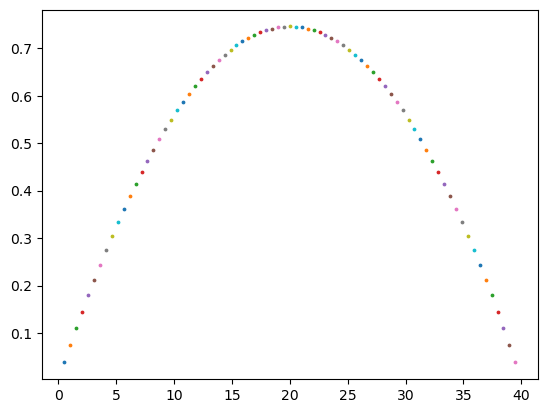

In [5]:
def initialize(init_v):
    """
    Initializes the position, velocity and acceleration of a particle based on its initial velocity.
    
    Parameters:
        init_v (array): initial velocity of the particle in the x and y-axis.
        
    Returns:
        x, v, a (tuple): initial position, velocity and acceleration of the particle.
        
    Internal Variables:
        x (array): initial position of the particle.
        a (array): initial acceleration of the particle.
        v (array): initial velocity of the particle.
        
    Functionality:
        1. Set initial position of the particle to (0, 0)
        2. Set initial acceleration of the particle to (0, -9.81)
        3. Set initial velocity of the particle to the provided init_v
        4. Return the initial position, velocity and acceleration as a tuple
    """
    x = jnp.array([0,0]) #[ti.random(), ti.random()]
    a = jnp.array([0, -9.81])
    v = init_v
    return x, v, a

initialize_jit = jit(initialize)

# Compute loss
def compute_loss(x, goal):
    loss = (x[0] - goal[0])**2 + (x[1] - goal[1])**2
    print("Loss is: ", loss)
    return loss

compute_loss_jit = jit(compute_loss)


@jit
def forward(init_v):
    """
    Computes the loss of a particle based on its initial velocity and the target position.
    
    Parameters:
        init_v (array): initial velocity of the particle in the x and y-axis.
    
    Returns:
        loss (float): the computed loss based on the difference between the final position of the particle and the target position.
    
    Internal Variables:
        dt (float): time step for the simulation.
        g (float): acceleration due to gravity.
        goal (array): target position for the particle.
        x, v, a (arrays): initial position, velocity and acceleration for the particle.
        steps (int): the number of steps taken in the simulation.
    
    Functionality:
        1. Initializes the position, velocity and acceleration of the particle using the 'initialize' function and the provided initial velocity.
        2. Runs a loop for the number of steps specified in the 'steps' variable.
        3. At each step of the loop, the position of the particle is updated by adding the product of the velocity and the time step. The velocity is also updated by adding the product of the acceleration and the time step.
        4. The final loss is computed by calling the 'compute_loss' function and passing the final position of the particle and the target position as arguments.
        5. Returns the loss
    """
    dt = 1e-2
    # Target position
    goal = jnp.array([40.0, 0.0])
    x, v, a = initialize(init_v)
    # Steps = time of flight / dt
    steps = 78 #int(2 * init_v[1] / g / dt)
    for i in range(steps):
        x = x + dt * v  #  pos update
        v = v + dt * a  #  velocity update
    loss = compute_loss(x, goal)
    return loss

# Optimization
x = jnp.array([0, 0])
v = jnp.array([0, 0])
angle = math.radians(30)
init_v = jnp.array([10 * math.cos(angle), 10 * math.sin(angle)])

# Gradients
df = grad(forward)

for i in range(100):
    init_v = init_v - 0.1 * df(init_v)

# Final solution
dt = 1e-2
g = 9.81
# Target position
goal = jnp.array([40.0, 0.0])
x, v, a = initialize(init_v)
steps = int(2 * init_v[1] / g / dt)

for i in range(steps):
    x = x +  dt * v  #  pos update
    v = v + dt * a  #  velocity update
    plt.scatter(x[0], x[1], 3)

loss = compute_loss_jit(x, goal)
print("Init v: {} magnitude: {}".format(init_v, linalg.norm(init_v)))
print("Target: {}".format(2 * init_v[0] * init_v[1] / 9.81))
print("Loss: {}".format(loss))
print("Steps: {}".format(steps))

# Forward model of 1D acoustic wave

We will delve into the 1D acoustic wave equation and outline how a finite difference scheme can be employed to solve it.

## 1D Acoustic Wave Equation

The 1D acoustic wave equation describes how pressure variations or acoustic waves propagate over time. In one spatial dimension, it is given by:

$$ \frac{\partial^2 u(x, t)}{\partial t^2} = c^2 \frac{\partial^2 u(x, t)}{\partial x^2} $$

Where:
- $ u(x, t) $ is the velocity as a function of position $ x $ and time $ t $.
- $ c $ is the speed of sound in the medium.

## Finite Difference Solver

### Discretization:

To solve the equation numerically, we discretize both time and space. Let:
- $ \Delta x $ be the spatial step.
- $ \Delta t $ be the time step.
- $ u_i^n $ be the pressure at spatial point $ i $ and time step $ n $.

### Finite Difference Approximation:

Using a second-order central difference scheme for both time and space, we can approximate the wave equation as:

$$ \frac{u_i^{n+1} - 2u_i^n + u_i^{n-1}}{\Delta t^2} = c^2 \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2} $$

From this equation, the pressure at the next time step $ u_i^{n+1} $ can be isolated:

$$ u_i^{n+1} = c^2 \frac{\Delta t^2}{\Delta x^2} (u_{i+1}^n - 2u_i^n + u_{i-1}^n) + 2u_i^n - u_i^{n-1} $$

### Boundary Conditions:

To implement this scheme, appropriate boundary conditions need to be applied at the spatial extents of the domain.

- **Dirichlet Boundary Condition**: Fixes the value at the boundary. For example: $ u_0^n = u_N^n = 0 $.
- **Neumann Boundary Condition**: Fixes the spatial derivative at the boundary.

### Implementation:

Iterating through time, we can use the finite difference approximation to update the pressure at each spatial point, ensuring to apply boundary conditions at each time step.


# 1D Full Waveform Inversion (FWI)

Full Waveform Inversion (FWI) is an advanced seismic inversion method used to estimate subsurface parameters by minimizing the difference between observed and modeled data. In this document, we'll explore the basics of 1D FWI.

## Concept:

FWI aims to iteratively refine a model of the subsurface until synthetic seismograms generated from the model closely match the observed field data.

## Objective Function:

To measure the difference between observed $d_{obs}$ and modeled $d_{cal}$ data, an objective function $J$ is employed, which is usually the L2 norm of their difference:

$$J(m) = \frac{1}{2} \int (d_{obs}(t) - d_{cal}(m, t))^2 dt$$

Where:
- $m$ represents the subsurface model parameters (like velocity).
- $t$ is the time.

The goal of FWI is to minimize this objective function.

## Gradient Descent:

To minimize $J$, we typically use a gradient-based optimization method. The gradient of $J$ with respect to the model parameters is computed, which indicates the direction in which $m$ should be updated to decrease $J$.

## Adjoint Method:

One efficient method for computing the gradient involves the adjoint state technique. Here's a basic outline:

1. **Forward modeling**: Solve the wave equation using the current model $m$ to get $d_{cal}$.
2. **Data residual**: Compute the difference between $d_{cal}$ and $d_{obs}$.
3. **Adjoint modeling**: Using the data residual as a source, solve the wave equation backward in time.
4. **Compute the gradient**: The gradient is then computed using the forward and adjoint wavefields.

## Model Update:

Once the gradient is known, the model is updated using:

$$m_{new} = m_{old} - \alpha \times \nabla J$$

Where:
- $\alpha$ is a step length or learning rate.
- $\nabla J$ is the gradient of the objective function.

## Repeat:

This process is iteratively repeated until the objective function converges to a minimum value or other stopping criteria are met.

## Regularization and Challenge:

FWI is highly non-linear and can be sensitive to noise, initial model inaccuracies, and local minima. Regularization techniques, multi-scale inversions (starting with low frequencies), and good initial models can help in achieving robust and reliable inversions.

1D FWI provides an avenue for estimating subsurface properties by iteratively updating a model to best match observed data. Though powerful, it requires careful setup and handling to ensure accurate and meaningful results.


# Adjoing Method

The adjoint method is a mathematical technique commonly used in optimization problems, particularly in the context of inverse problems and optimal control. The adjoint method enables the efficient computation of gradients, which are crucial for many optimization algorithms. The essence of the method is to transform the problem such that the cost of gradient computation is relatively independent of the number of parameters.

Let's begin with the basics and then illustrate with a simple example:

Consider a function 

$$ y = f(u) $$ 

where $ y $ is the output and $ u $ is the input. Now, assume we have a cost (or objective) function 

$$ J(y) $$. 

The goal might be to minimize $ J $ by adjusting $ u $. If we're interested in the sensitivity of $ J $ with respect to $u $, we'd like to compute 

$$ \frac{dJ}{du} $$.

Chain rule tells us that:
$$ \frac{dJ}{du} = \frac{dJ}{dy} \frac{dy}{du} $$

Computing this directly can be costly if $ y $ is high dimensional, which is often the case in complex problems.

The adjoint method tackles this by introducing an adjoint variable $ p $, such that:

$$ p = \frac{dJ}{dy} $$

With this, our gradient becomes:

$$ \frac{dJ}{du} = p \frac{dy}{du} $$

The computation of $ p $ is typically done by solving the adjoint equation, which is derived from the differential equation governing $ y $.

## Simple Example

Let's consider a very simple example to illustrate the concept. 

Consider: 
$$y = u^2$$

$$ J(y) = (y - d)^2 $$ 

where $ d $ is a given reference value.

Given 

$$ y = u^2 $$

$$ \frac{dy}{du} = 2u $$

To compute the gradient of $ J $ with respect to $ u $:

$$ \frac{dJ}{du} = \frac{dJ}{dy} \frac{dy}{du} $$

From our cost function, 

$$ \frac{dJ}{dy} = 2(y - d) $$

This is our adjoint variable $ p $.

So,
$$ p = 2(y - d) $$
$$ \frac{dJ}{du} = p \times 2u = 2u(2(y - d)) = 4u(y - d) $$

The adjoint method helped us decompose the gradient computation into manageable parts. In more complex problems, especially involving differential equations, the adjoint method proves to be very efficient compared to direct sensitivity analyses.


# Comparison: Reverse Mode AD vs. Adjoint Method

Consider a simple ordinary differential equation (ODE) and an associated cost function:

## Problem Setup:

Suppose we have an ODE:

$$ \frac{dy}{dt} = -ky, \quad y(0) = y_0 $$

Where $ k$ is a constant. We aim to minimize the cost function:

$$ J(y, k) = \int_0^T (y(t) - d(t))^2 dt $$

Where $ d(t)$ is some desired trajectory.

## Reverse Mode AD:

For reverse mode AD, the process would be:

1. Discretize the ODE and solve it to get a trajectory $ y(t)$ for a given $ k$.
2. Evaluate the cost $ J$ using this trajectory.
3. Compute the derivative of $ J$ by backpropagating the gradient from the final time step to the initial time step.

This approach can be memory intensive.

## Adjoint Method:

The adjoint method introduces an adjoint variable $ p(t)$:

$$ p(t) = \frac{\partial J}{\partial y(t)} $$

1. Solve the original ODE forward in time to get $ y(t)$.
2. Set up the adjoint equation:

$$ -\frac{dp}{dt} = k p - 2(y(t) - d(t)) $$

With terminal condition: $ p(T) = 0$.

3. Solve the adjoint equation backward in time to get $ p(t)$.
4. The gradient of $ J$ with respect to $ y_0$ is given by $ p(0)$. The gradient with respect to $ k$ is:

$$ \frac{\partial J}{\partial k} = \int_0^T p(t) \cdot y(t) dt $$

## Key Differences:

- **Computation**: Reverse mode AD is algorithmic and can be applied directly. The adjoint method requires manual derivation of the adjoint equations.
- **Memory**: Reverse mode AD can be memory-intensive, especially for long trajectories. The adjoint method can be less so.
- **Use Cases**: Reverse mode AD is versatile and can handle various computational graphs, while the adjoint method is more specific to differential equations and optimization.

![1D FWI](1dfwi.png)

> Forward and inverse modeling of waveform - Identifying the soil profile based on the velocity measurements

![1D FWI AD](fwi.gif)

> How AD FWI works

## FWI Forward model

In [8]:
!pip3 install optax

  Obtaining dependency information for optax from https://files.pythonhosted.org/packages/13/71/787cc24c4b606f3bb9f1d14957ebd7cb9e4234f6d59081721230b2032196/optax-0.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for chex>=0.1.5 from https://files.pythonhosted.org/packages/8b/c5/ab99c61d1384f89fe0d89b4b105c1ad22dab98cfe8c78136fb8c3f75f75b/chex-0.1.83-py3-none-any.whl.metadata
  Using cached toolz-0.12.0-py3-none-any.whl (55 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 5.2 MB/s eta 0:00:00


Wave equation: $u_0 = \exp\left(-5(x_0 - 0.5)^2\right)$

### Central difference 

$$u2[j] = 2*u1[j] -u0[j] + C2*(u1[j-1]-2*u1[j]+u1[j+1])$$

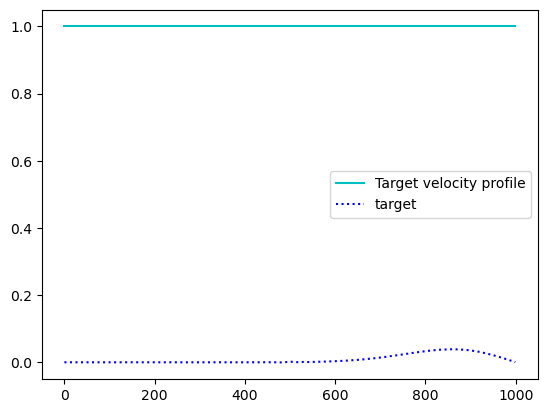

In [9]:
import jax.numpy as jnp
from jax import grad, jit, vmap, lax
import jax.scipy as jsp
import jax.scipy.optimize as jsp_opt
import optax 
import matplotlib.pyplot as plt


# Set up an n-point uniform mesh
n = 1000
dx = 1.0/(n-1)
x0 = jnp.linspace(0.0,1.0,n)

@jit
def wave_propagation(params):
    c = params
    dt = 5e-4
    # Sanity check the physical constants
    C = c*dt/dx
    C2 = C*C
    # C should be < 1 for stability

    # Set up initial conditions
    u0 = jnp.exp(-(5*(x0-0.5))**2)
    u1 = jnp.exp(-(5*(x0-0.5-c*dt))**2)
    u2 = jnp.zeros(n)
    def step(i, carry):
        u0, u1, u2 = carry
        # Shift right to get j - 1 and set the first value to 0
        u1p = jnp.roll(u1, 1)
        u1p = u1p.at[0].set(0)
        # Shift left to get j + 1 and set the last value to 0
        u1n = jnp.roll(u1, -1)
        u1n = u1n.at[n - 1].set(0)
        # Central difference in space and finite difference in time
        #  u2[j] = 2*u1[j] -u0[j] + C2*(u1[j-1]-2*u1[j]+u1[j+1])
        u2 = 2 * u1 - u0 + C2*(u1p -2*u1 +u1n)
        u0 = u1
        u1 = u2
        return (u0, u1, u2)
    # Space for time steps
    u0, u1, u2 = lax.fori_loop(0, 5000, step, (u0, u1, u2))

    return u2

# Assign target
ctarget = 1.0 # constant model
target = wave_propagation(ctarget)

# Velocity profile
plt.plot(jnp.ones(n) * ctarget, 'c', label='Target velocity profile')

plt.plot(target, 'b:', label='target')
plt.legend()
#plt.savefig("waves.png")
plt.show()

## FWI inverse modeling

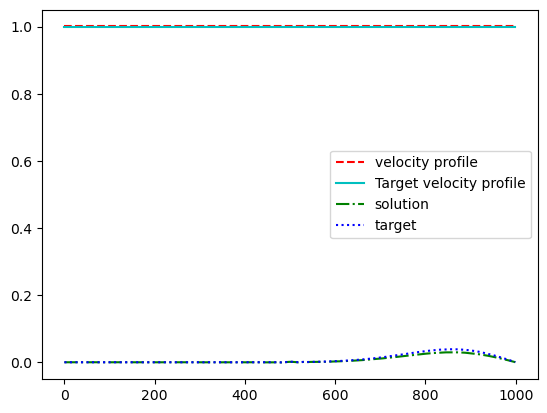

In [10]:
import jax.numpy as jnp
from jax import grad, jit, vmap, lax
import jax.scipy as jsp
import jax.scipy.optimize as jsp_opt
import optax 
import matplotlib.pyplot as plt


# Set up an n-point uniform mesh
n = 1000
dx = 1.0/(n-1)
x0 = jnp.linspace(0.0,1.0,n)

@jit
def wave_propagation(params):
    c = params
    dt = 5e-4
    # Sanity check the physical constants
    C = c*dt/dx
    C2 = C*C
    # C should be < 1 for stability

    # Set up initial conditions
    u0 = jnp.exp(-(5*(x0-0.5))**2)
    u1 = jnp.exp(-(5*(x0-0.5-c*dt))**2)
    u2 = jnp.zeros(n)
    def step(i, carry):
        u0, u1, u2 = carry
        # Shift right to get j - 1 and set the first value to 0
        u1p = jnp.roll(u1, 1)
        u1p = u1p.at[0].set(0)
        # Shift left to get j + 1 and set the last value to 0
        u1n = jnp.roll(u1, -1)
        u1n = u1n.at[n - 1].set(0)
        # Central difference in space and finite difference in time
        #  u2[j] = 2*u1[j] -u0[j] + C2*(u1[j-1]-2*u1[j]+u1[j+1])
        u2 = 2 * u1 - u0 + C2*(u1p -2*u1 +u1n)
        u0 = u1
        u1 = u2
        return (u0, u1, u2)
    # Space for time steps
    u0, u1, u2 = lax.fori_loop(0, 5000, step, (u0, u1, u2))

    return u2

# Assign target
ctarget = 1.0 # constant model
target = wave_propagation(ctarget)

@jit
def compute_loss(c):
    u2 = wave_propagation(c)
    return jnp.linalg.norm(u2 - target)

# Gradient of forward problem
df = grad(compute_loss)

start_learning_rate = 1e-3
optimizer = optax.adam(start_learning_rate)

# Initialize parameters of the model + optimizer.
params =  0.85 # Constant model
opt_state = optimizer.init(params)

# A simple update loop.
for _ in range(1000):
  grads = grad(compute_loss)(params)
  updates, opt_state = optimizer.update(grads, opt_state)
  params = optax.apply_updates(params, updates)


# Velocity profile
plt.plot(jnp.ones(n) * params, 'r--', label='velocity profile')
plt.plot(jnp.ones(n) * ctarget, 'c', label='Target velocity profile')

# Waves
wave = wave_propagation(params)

plt.plot(wave, 'g-.', label='solution')
plt.plot(target, 'b:', label='target')
plt.legend()
plt.savefig("waves.png")

## Linear velocity profile

# Newton's Method for Optimization

Newton's method aims to find the roots of a function by approximating the function using a second-order Taylor series expansion. In optimization, we're trying to find where the gradient (first derivative) is zero.

The update rule in Newton's method is given by:
$$x_{k+1} = x_k - [\nabla^2 f(x_k)]^{-1} \nabla f(x_k)$$

Where:
- $x_k$ is the current estimate.
- $\nabla^2 f(x_k)$ is the Hessian matrix at $x_k$ (matrix of second derivatives).
- $\nabla f(x_k)$ is the gradient vector at $x_k$.

The primary challenge with Newton's method is that the Hessian might be expensive to compute and could be ill-conditioned or non-positive definite.

# BFGS (Broyden-Fletcher-Goldfarb-Shanno algorithm)

BFGS is a quasi-Newton method. Newton's method is a popular iterative algorithm to find the roots of a real-valued function (or to minimize/maximize a function). The idea is to approximate the function using its Taylor series and then iteratively refine the guess to get closer to the optimal solution.

BFGS approximates the inverse Hessian rather than computing it directly. The approximation is updated iteratively. Given a difference in gradients $s_k = \nabla f(x_{k+1}) - \nabla f(x_k)$ and a difference in steps $y_k = x_{k+1} - x_k$, the BFGS update for the inverse Hessian approximation $H_{k+1}$ is:

$$H_{k+1} = (I - \rho_k s_k y_k^T) H_k (I - \rho_k y_k s_k^T) + \rho_k s_k s_k^T$$
Where:
$$\rho_k = \frac{1}{y_k^T s_k}$$

This ensures that the Hessian approximation remains positive definite, avoiding one of the pitfalls of Newton's method.

## Benefits of BFGS:

* Doesn't require computation of the Hessian, only the gradient.
* Typically converges faster than the gradient descent.
* Hessian approximation ensures descent direction.

# L-BFGS (Limited-memory BFGS)

While BFGS works great for many optimization problems, when the number of parameters is very large (as is often the case in machine learning and particularly in deep learning), storing and manipulating the Hessian approximation becomes computationally expensive.

L-BFGS is a variation of BFGS that addresses this. Instead of storing the full Hessian approximation, L-BFGS stores only a few vectors that implicitly represent the approximation. This drastically reduces the memory requirement and makes the method scalable to large problems.

## Benefits of L-BFGS:

* Suitable for large-scale optimization problems due to reduced memory usage.
* Still retains many of the desirable properties of BFGS.
* Often used in machine learning for training models when the problem size is large.

# Comparison with Adam

Adam (Adaptive Moment Estimation) is a popular optimization algorithm used in deep learning. It combines the ideas of Momentum and RMSprop.

Adam's update rule is:
$$m_t = \beta_1 m_{t-1} + (1-\beta_1) \nabla f(x_t)$$
$$v_t = \beta_2 v_{t-1} + (1-\beta_2) (\nabla f(x_t))^2$$
$$x_{t+1} = x_t - \alpha \frac{m_t}{\sqrt{v_t} + \epsilon}$$

Where:
- $m_t$ is the moving average of the gradient.
- $v_t$ is the moving average of the squared gradient.
- $\alpha$ is the learning rate.
- $\beta_1, \beta_2$ are exponential decay rates for the moving averages.
- $\epsilon$ is a small number to prevent division by zero.

## BFGS vs Adam:

1. **Nature of Algorithm**:
   - BFGS is a quasi-Newton method that builds an approximation of the inverse Hessian to guide its search.
   - Adam is a first-order method with adaptive learning rates for each parameter, based on moving averages of the gradient and squared gradient.

2. **Memory Usage**:
   - BFGS requires storing the inverse Hessian approximation, which can be memory-intensive for large problems (though L-BFGS mitigates this).
   - Adam's memory usage is relatively low since it only maintains moving averages of the gradients.

3. **Convergence**:
   - BFGS generally has superlinear convergence, meaning it can converge faster than gradient-based methods on some problems.
   - Adam is known for its robustness and often works well even when hyperparameters are not finely tuned. However, its convergence properties are not as strong theoretically as BFGS.

4. **Usage**:
   - BFGS is often preferred for medium-sized optimization problems, especially when function evaluations are expensive or the function landscape is complex.
   - Adam is predominantly used in deep learning due to its efficiency and robustness on large-scale problems.

In summary, while both BFGS and Adam are powerful optimization algorithms, they come from different families of methods and are often chosen based on the problem size, complexity, and specific characteristics of the function being optimized.


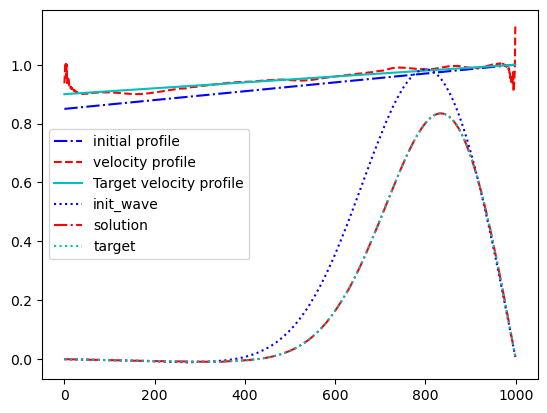

In [18]:
import jax.numpy as jnp
from jax import grad, jit, vmap, lax
import jax.scipy as jsp
import jax.scipy.optimize as jsp_opt
import optax 
import matplotlib.pyplot as plt
from tensorflow_probability.substrates import jax as tfp

# Set up an n-point uniform mesh
n = 1000
dx = 1.0/(n-1)
x0 = jnp.linspace(0.0,1.0,n)

@jit
def wave_propagation(params):
    c = params
    dt = 5e-4
    # Sanity check the physical constants
    C = c*dt/dx
    C2 = C*C
    # C should be < 1 for stability

    # Set up initial conditions
    u0 = jnp.exp(-(5*(x0-0.5))**2)
    u1 = jnp.exp(-(5*(x0-0.5-c*dt))**2)
    u2 = jnp.zeros(n)
    def step(i, carry):
        u0, u1, u2 = carry
        # Shift right to get j - 1 and set the first value to 0
        u1p = jnp.roll(u1, 1)
        u1p = u1p.at[0].set(0)
        # Shift left to get j + 1 and set the last value to 0
        u1n = jnp.roll(u1, -1)
        u1n = u1n.at[n - 1].set(0)
        # Central difference in space and finite difference in time
        #  u2[j] = 2*u1[j] -u0[j] + C2*(u1[j-1]-2*u1[j]+u1[j+1])
        u2 = 2 * u1 - u0 + C2*(u1p -2*u1 +u1n)
        u0 = u1
        u1 = u2
        return (u0, u1, u2)
    # Space for time steps
    u0, u1, u2 = lax.fori_loop(0, 5000, step, (u0, u1, u2))

    return u2

# Assign target
# ctarget = 1.0 # constant model
ctarget = jnp.linspace(0.9, 1.0, n) # Linear model
target = wave_propagation(ctarget)

# For TFP set jaxopt value_and_grad = True
# @jax.value_and_grad
def compute_loss(c):
    u2 = wave_propagation(c)
    return jnp.linalg.norm(u2 - target)

# Gradient of forward problem
df = grad(compute_loss)

start_learning_rate = 1e-3
optimizer = optax.adam(start_learning_rate)

# Initialize parameters of the model + optimizer.
# params =  0.85 # Constant model
params = jnp.linspace(0.85, 1.0, n)

# Optimizers
def optax_adam(params, niter):
  # Initialize parameters of the model + optimizer.
  start_learning_rate = 1e-3
  optimizer = optax.adam(start_learning_rate)
  opt_state = optimizer.init(params)

  # A simple update loop.
  for _ in range(niter):
    grads = grad(compute_loss)(params)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
  return params


# Tensor Flow Probability Optimization library
def tfp_lbfgs(params):
  results = tfp.optimizer.lbfgs_minimize(
        jit(compute_loss), initial_position=params, tolerance=1e-5)
  return results.position

# ADAM optimizer
result = optax_adam(params, 1000)     
# L-BFGS optimizer
# result = tfp_lbfgs(params)

# Velocity profile
plt.plot(jnp.ones(n) * params, 'b-.', label='initial profile')
plt.plot(jnp.ones(n) * result, 'r--', label='velocity profile')
plt.plot(jnp.ones(n) * ctarget, 'c', label='Target velocity profile')

# Waves
wave = wave_propagation(result)

# Initial wave
init_wave = wave_propagation(params)

plt.plot(init_wave, 'b:', label='init_wave')
plt.plot(wave, 'r-.', label='solution')
plt.plot(target, 'c:', label='target')
plt.legend()
# plt.savefig("waves.png")
plt.show()

> Note: Try with different initial conditions (velocity profiles) to see how well they optimize